In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("airport_skytrax_reviews.csv")

In [338]:
df.head()

,Airport,Review,Overall Rating,Recommended,Date of Visit,Type of Traveller,Experience,Terminal Cleanliness,Terminal Seating,Terminal Signs,Food & Beverages,Airport Shopping,Wifi Connectivity,Airport Staff
0,Istanbul,✅ Trip Verified | I'm flying 50-60 times a y...,1.0,no,February 2025,Business,Departure Only,4.0,2.0,3.0,1.0,NaN,NaN,2.0
1,Istanbul,Not Verified | Ridiculous prices on everythin...,2.0,no,February 2025,Family Leisure,Arrival and Departure,2.0,1.0,3.0,1.0,1.0,1.0,1.0
2,Istanbul,Not Verified | The biggest trap for the touri...,1.0,no,February 2025,Couple Leisure,Departure Only,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Istanbul,✅ Trip Verified | Fast food price is just ri...,2.0,no,January 2025,Solo Leisure,Transit,5.0,5.0,5.0,1.0,1.0,5.0,3.0
4,Istanbul,✅ Trip Verified | This airport is luxury and...,2.0,no,January 2025,Business,Arrival and Departure,1.0,2.0,3.0,3.0,4.0,2.0,1.0


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2670 entries, 0 to 2669
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport               2670 non-null   object 
 1   Review                2670 non-null   object 
 2   Overall Rating        2590 non-null   float64
 3   Recommended           2670 non-null   object 
 4   Date of Visit         1980 non-null   object 
 5   Type of Traveller     1983 non-null   object 
 6   Experience            1983 non-null   object 
 7   Terminal Cleanliness  2609 non-null   float64
 8   Terminal Seating      1795 non-null   float64
 9   Terminal Signs        1941 non-null   float64
 10  Food & Beverages      1961 non-null   float64
 11  Airport Shopping      2234 non-null   float64
 12  Wifi Connectivity     1616 non-null   float64
 13  Airport Staff         1860 non-null   float64
dtypes: float64(8), object(6)
memory usage: 292.2+ KB


In [344]:
df["Airport"].unique()

array(['Istanbul', 'Dubai', 'Doha', 'Abu Dhabi', 'Bangkok', 'Singapore',
       'Hong Kong', 'Delhi', 'Mumbai', 'Bangalore', 'Hyderabad'],
      dtype=object)

In [251]:
df.isna().sum()

Airport                    0
Review                     0
Overall Rating            80
Recommended                0
Date of Visit            690
Type of Traveller        687
Experience               687
Terminal Cleanliness      61
Terminal Seating         875
Terminal Signs           729
Food & Beverages         709
Airport Shopping         436
Wifi Connectivity       1054
Airport Staff            810
dtype: int64

There are several missing values, to understand what method can be done to handle these missing values, box plots are being done

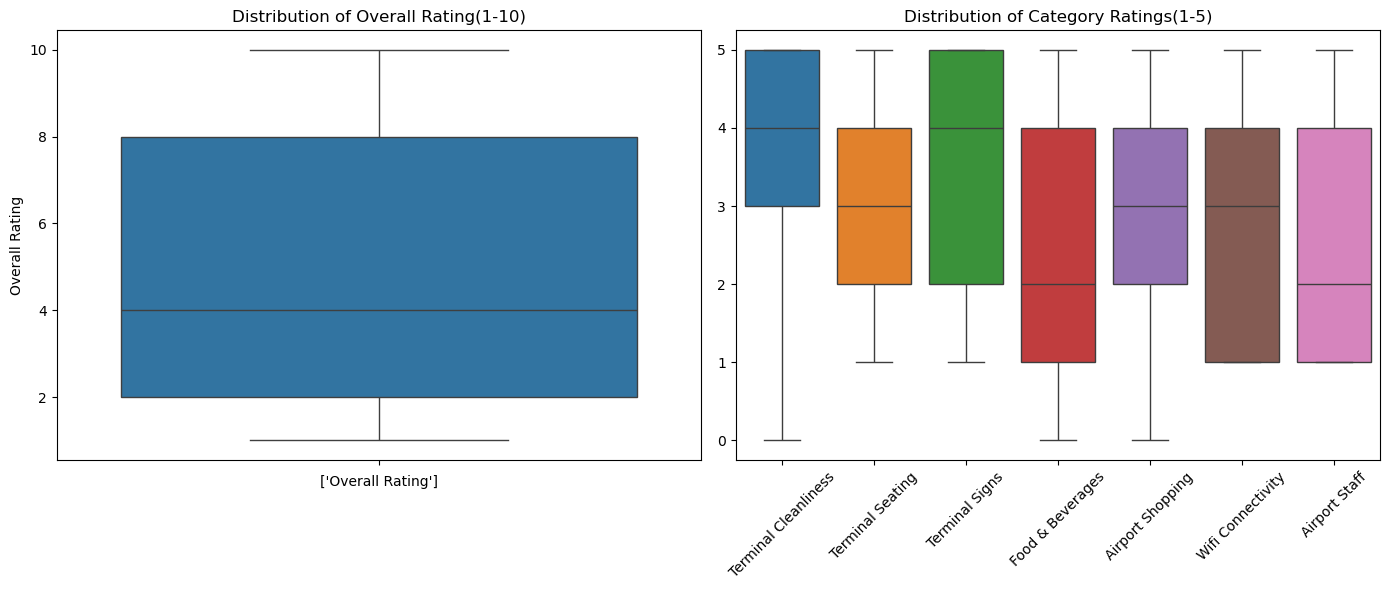

In [253]:
#Setting up box plots for visualisations
category_rating_columns = [
    "Terminal Cleanliness", "Terminal Seating", "Terminal Signs",
    "Food & Beverages", "Airport Shopping", "Wifi Connectivity", "Airport Staff"
]

#Setting up figure to separate 1-10 and 1-5 rating columns
fig, axes = plt.subplots(1,2, figsize=(14,6))

#Box Plot for 1-10 scale rating
sns.boxplot(data=df["Overall Rating"], ax=axes[0])
axes[0].set_title("Distribution of Overall Rating(1-10)")
axes[0].set_xlabel(["Overall Rating"])

#Boxplot for 1 to 5 scale ratings
sns.boxplot(data=df[category_rating_columns], ax=axes[1])
axes[1].set_title("Distribution of Category Ratings(1-5)")
axes[1].set_xticks(range(len(category_rating_columns))) 
axes[1].set_xticklabels(category_rating_columns, rotation=45)

plt.tight_layout()
plt.show()

Boxplot Insights- 
1. Overall Rating (1-10)- Box Range shows that 50% of the reviews fall within this range. Whiskers extend from 1 to 10 indicating mimumum and maximum ratings were 1 and 10. There is asymmetry since the box is not centered around 5, suggesting skewness in ratings

2. Category Ratings (1-5)- Most categories have a box around 5, suggesting that most users rated these categories highly. Whiskers are sometimes 0 or 1, indicating some users gave extremely low in most or extremely high ratings (5). 

In [255]:
summary = df[rating_columns].agg(["mean", "median"])
print(summary)

        Overall Rating  Terminal Cleanliness  Terminal Seating  \
mean           4.73668              3.551169          2.946518   
median         4.00000              4.000000          3.000000   

        Terminal Signs  Food & Beverages  Airport Shopping  Wifi Connectivity  \
mean          3.294178          2.464049          3.150403           2.788366   
median        4.000000          2.000000          3.000000           3.000000   

        Airport Staff  
mean         2.603226  
median       2.000000  


Whiskers extend from 1 to 10 with overall rating, showing slightly right-skewed distribution. From the summary data median was chosen over men as a way to fill in missing values due to skewness and potential outliers. 

Additionally, for category ratings most have a rating median of 3 or 4. The mean is slightly lower than the medians probably because extremely lower ratings are pulling the mean down or foe some columns the extremely high values are pulling the mean up. 

As a result, median is decided as a way to impute mean values as it is less affected by extreme values. 

In [258]:
#Check value counts for 'Type of Traveller' and 'Experience'

print("Type of Traveller distribution:\n", df["Type of Traveller"].value_counts(), "\n")
print("Experience distribution:\n", df["Experience"].value_counts())
      

Type of Traveller distribution:
 Type of Traveller
Solo Leisure      725
Family Leisure    459
Business          421
Couple Leisure    378
Name: count, dtype: int64 

Experience distribution:
 Experience
Arrival and Departure    652
Transit                  572
Departure Only           553
Arrival Only             206
Name: count, dtype: int64


Since less than solo leisure for type of traveller and arrival and departure for experience distribution have less than 50% of the values, the missing values will be filled with "Unknown" instead of the mode. 

**Filling Missing values**
Missing columns from numerical values will be filled by median and categorical columns will be filled by imputing the model

Missing columns from object values will be filled with "Unknown"

In [346]:
numerical_cols = ["Overall Rating", "Terminal Cleanliness", "Terminal Seating", "Terminal Signs",
                  "Food & Beverages", "Airport Shopping", "Wifi Connectivity", "Airport Staff"]
df[numerical_cols]= df[numerical_cols].fillna(df[numerical_cols].median())

#Object columns
object_cols = ["Date of Visit", "Type of Traveller", "Experience"]

df[object_cols] = df[object_cols].fillna("Unknown")

print(df.isna().sum())

Airport                 0
Review                  0
Overall Rating          0
Recommended             0
Date of Visit           0
Type of Traveller       0
Experience              0
Terminal Cleanliness    0
Terminal Seating        0
Terminal Signs          0
Food & Beverages        0
Airport Shopping        0
Wifi Connectivity       0
Airport Staff           0
dtype: int64


In [348]:
duplicated_rows = df.duplicated().sum()
print(f"Total duplicate rows: {duplicated_rows}")

Total duplicate rows: 2


In [350]:
print("Before removing duplicates:")
print(df["Airport"].value_counts())  

df = df.drop_duplicates(subset=["Review"], keep="first")  

print("\nAfter removing duplicates:")
print(df["Airport"].value_counts())  


Before removing duplicates:
Airport
Istanbul     300
Dubai        300
Bangkok      300
Singapore    300
Hong Kong    300
Delhi        300
Mumbai       300
Abu Dhabi    262
Doha         120
Bangalore    117
Hyderabad     71
Name: count, dtype: int64

After removing duplicates:
Airport
Istanbul     300
Dubai        300
Singapore    300
Delhi        300
Mumbai       300
Bangkok      299
Hong Kong    299
Abu Dhabi    261
Doha         120
Bangalore    116
Hyderabad     71
Name: count, dtype: int64


In [352]:
df.duplicated().sum()

0

In [354]:
df["Airport"].unique()

array(['Istanbul', 'Dubai', 'Doha', 'Abu Dhabi', 'Bangkok', 'Singapore',
       'Hong Kong', 'Delhi', 'Mumbai', 'Bangalore', 'Hyderabad'],
      dtype=object)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 0 to 2669
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport               2666 non-null   object 
 1   Review                2666 non-null   object 
 2   Overall Rating        2666 non-null   float64
 3   Recommended           2666 non-null   object 
 4   Date of Visit         2666 non-null   object 
 5   Type of Traveller     2666 non-null   object 
 6   Experience            2666 non-null   object 
 7   Terminal Cleanliness  2666 non-null   float64
 8   Terminal Seating      2666 non-null   float64
 9   Terminal Signs        2666 non-null   float64
 10  Food & Beverages      2666 non-null   float64
 11  Airport Shopping      2666 non-null   float64
 12  Wifi Connectivity     2666 non-null   float64
 13  Airport Staff         2666 non-null   float64
dtypes: float64(8), object(6)
memory usage: 312.4+ KB


In [358]:
#Standardise column formats
df["Recommended"] = df["Recommended"].map({"yes":1, "no":0})

#Removing Special Characters and extra spaces in Review

df["Review"] = df["Review"].str.replace(r"\s+", " ", regex=True).str.strip()

In [364]:

# Convert "Unknown" to NaN
df["Date of Visit"] = df["Date of Visit"].replace("Unknown", pd.NA)

# Convert to datetime (only extracting the year)
df["Year"] = pd.to_datetime(df["Date of Visit"], format="%B %Y", errors="coerce").dt.year

# Handle missing years (replace NaN with "Unknown" if needed)
df["Year"] = df["Year"].fillna("Unknown").astype(str)

# Drop "Date of Visit" column
df.drop(columns=["Date of Visit"], inplace=True)


In [366]:
df.head()

,Airport,Review,Overall Rating,Recommended,Type of Traveller,Experience,Terminal Cleanliness,Terminal Seating,Terminal Signs,Food & Beverages,Airport Shopping,Wifi Connectivity,Airport Staff,Year
0,Istanbul,✅ Trip Verified | I'm flying 50-60 times a yea...,1.0,0,Business,Departure Only,4.0,2.0,3.0,1.0,3.0,3.0,2.0,2025.0
1,Istanbul,Not Verified | Ridiculous prices on everything...,2.0,0,Family Leisure,Arrival and Departure,2.0,1.0,3.0,1.0,1.0,1.0,1.0,2025.0
2,Istanbul,Not Verified | The biggest trap for the touris...,1.0,0,Couple Leisure,Departure Only,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2025.0
3,Istanbul,✅ Trip Verified | Fast food price is just ridi...,2.0,0,Solo Leisure,Transit,5.0,5.0,5.0,1.0,1.0,5.0,3.0,2025.0
4,Istanbul,✅ Trip Verified | This airport is luxury and n...,2.0,0,Business,Arrival and Departure,1.0,2.0,3.0,3.0,4.0,2.0,1.0,2025.0


In [362]:
df["Recommended"].value_counts()

Recommended
0    1605
1    1061
Name: count, dtype: int64

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, 0 to 2669
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport               2666 non-null   object 
 1   Review                2666 non-null   object 
 2   Overall Rating        2666 non-null   float64
 3   Recommended           2666 non-null   int64  
 4   Type of Traveller     2666 non-null   object 
 5   Experience            2666 non-null   object 
 6   Terminal Cleanliness  2666 non-null   float64
 7   Terminal Seating      2666 non-null   float64
 8   Terminal Signs        2666 non-null   float64
 9   Food & Beverages      2666 non-null   float64
 10  Airport Shopping      2666 non-null   float64
 11  Wifi Connectivity     2666 non-null   float64
 12  Airport Staff         2666 non-null   float64
 13  Year                  2666 non-null   object 
dtypes: float64(8), int64(1), object(5)
memory usage: 312.4+ KB


In [370]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")  # Convert numbers, keep NaNs
df["Year"] = df["Year"].fillna("Unknown")  # Replace NaNs with "Unknown"

In [374]:
df["Year"].unique()

array([2025.0, 2024.0, 2023.0, 2022.0, 2021.0, 2020.0, 2019.0, 2018.0,
       2017.0, 2016.0, 2015.0, 'Unknown', 2014.0], dtype=object)

In [376]:
df.describe()

,Overall Rating,Recommended,Terminal Cleanliness,Terminal Seating,Terminal Signs,Food & Beverages,Airport Shopping,Wifi Connectivity,Airport Staff
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,4.712303,0.397974,3.562641,2.963991,3.486122,2.340960,3.125656,2.870968,2.420105
std,3.105786,0.489572,1.309804,1.195448,1.279069,1.491322,1.325023,1.201877,1.310297
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,3.000000,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000
50%,4.000000,0.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000
75%,8.000000,1.000000,5.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
max,10.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [378]:
df.head()

,Airport,Review,Overall Rating,Recommended,Type of Traveller,Experience,Terminal Cleanliness,Terminal Seating,Terminal Signs,Food & Beverages,Airport Shopping,Wifi Connectivity,Airport Staff,Year
0,Istanbul,✅ Trip Verified | I'm flying 50-60 times a yea...,1.0,0,Business,Departure Only,4.0,2.0,3.0,1.0,3.0,3.0,2.0,2025.0
1,Istanbul,Not Verified | Ridiculous prices on everything...,2.0,0,Family Leisure,Arrival and Departure,2.0,1.0,3.0,1.0,1.0,1.0,1.0,2025.0
2,Istanbul,Not Verified | The biggest trap for the touris...,1.0,0,Couple Leisure,Departure Only,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2025.0
3,Istanbul,✅ Trip Verified | Fast food price is just ridi...,2.0,0,Solo Leisure,Transit,5.0,5.0,5.0,1.0,1.0,5.0,3.0,2025.0
4,Istanbul,✅ Trip Verified | This airport is luxury and n...,2.0,0,Business,Arrival and Departure,1.0,2.0,3.0,3.0,4.0,2.0,1.0,2025.0


In [384]:
df.to_csv("cleaned_df.csv", index=False)
print("Filed saved as cleaned_df")

Filed saved as cleaned_df
